In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("train.csv") 

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
data['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [9]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [10]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [11]:
num_columns = data.select_dtypes(include=np.number).columns
num_columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [12]:
cat_columns = data.select_dtypes(exclude=np.number).columns
cat_columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [13]:
print('We have', len(cat_columns), 'categorical variables that are', list(cat_columns))
print('We have', len(num_columns), 'numerical variables that are', list(num_columns))

We have 5 categorical variables that are ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
We have 7 numerical variables that are ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [14]:
num_variables = []
cat_variables = []

for i in data.columns:
    if data[i].dtype=='object':
        cat_variables.append(i)
    else:
        num_variables.append(i)
        
print('We have', len(cat_variables), 'categorical variables that are', list(cat_variables))
print('We have', len(num_variables), 'numerical variables that are', list(num_variables))

We have 5 categorical variables that are ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
We have 7 numerical variables that are ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [15]:
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [16]:
data.std()

PassengerId    257.353842
Survived         0.486592
Pclass           0.836071
Age             14.526497
SibSp            1.102743
Parch            0.806057
Fare            49.693429
dtype: float64

In [17]:
# univariate analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


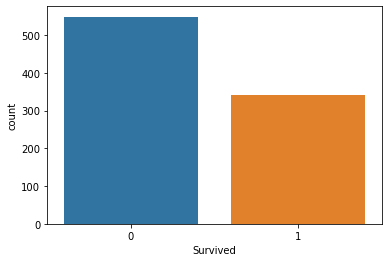

In [18]:
sns.countplot(data.Survived)
plt.show()

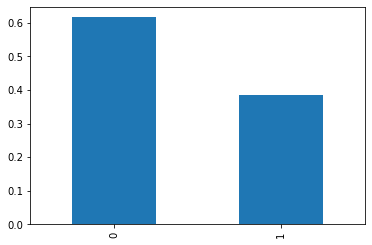

In [19]:
data['Survived'].value_counts(normalize = True).plot.bar()
plt.show()

In [20]:
data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:>

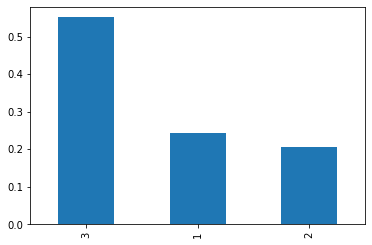

In [21]:
data.Pclass.value_counts(normalize=True).plot.bar()

<BarContainer object of 3 artists>

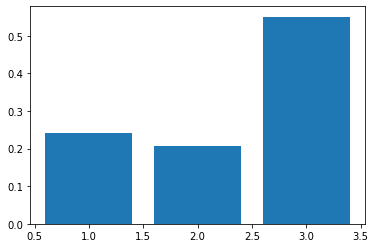

In [22]:
plt.bar(data['Pclass'].value_counts().index, data['Pclass'].value_counts(1))

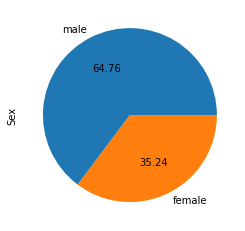

In [23]:
data.Sex.value_counts().plot.pie(autopct='%.2f')
plt.show()

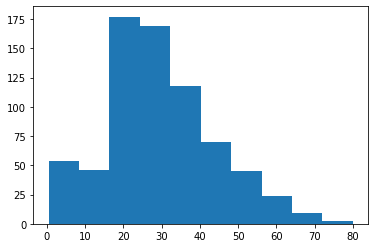

In [24]:
plt.hist(data.Age)
plt.show()

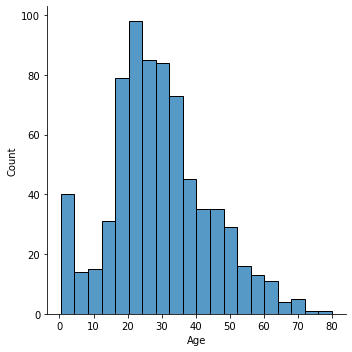

In [25]:
sns.displot(data.Age)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

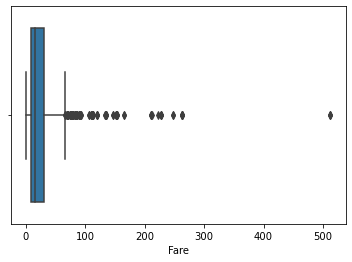

In [26]:
sns.boxplot(data.Fare)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

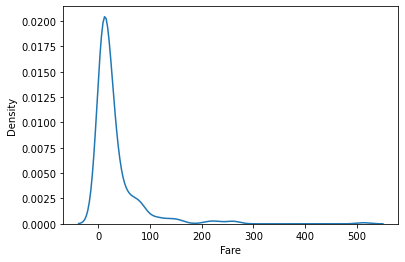

In [27]:
sns.kdeplot(data.Fare)

<AxesSubplot:>

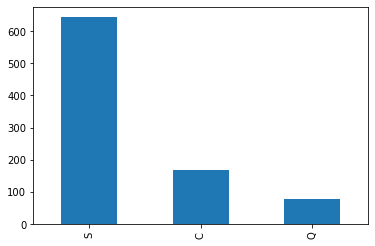

In [28]:
data.Embarked.value_counts().plot.bar()

In [29]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
data.Fare.skew()

4.787316519674893

In [31]:
data.Age.skew()

0.38910778230082704

In [32]:
data['Fare'].kurt()

33.39814088089868

In [33]:
data['Age'].kurt()

0.17827415364210353

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


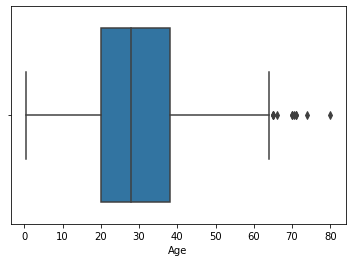

In [34]:
sns.boxplot(data.Age,whis=1.5)
plt.show()

In [35]:
np.quantile(data['Fare'],0.75)

31.0

In [36]:
# multivariate

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


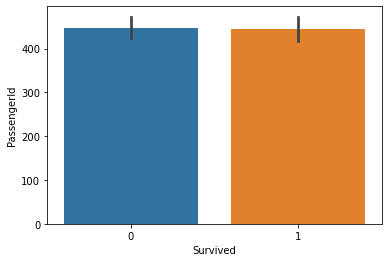

In [37]:
sns.barplot(data['Survived'], data['PassengerId'])
plt.show()

In [38]:
pd.DataFrame(data.groupby('Survived').mean()['PassengerId'])

,PassengerId
Survived,
0,447.016393
1,444.368421


<AxesSubplot:xlabel='Pclass'>

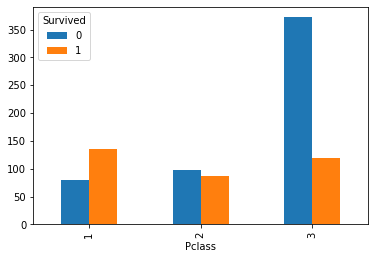

In [39]:
data.groupby('Pclass')['Survived'].value_counts().unstack().plot.bar()

<AxesSubplot:xlabel='Survived', ylabel='count'>

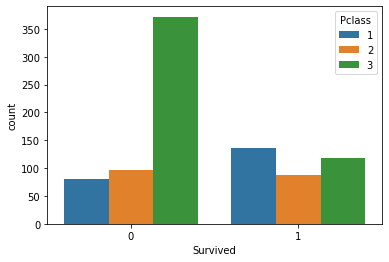

In [40]:
sns.countplot(x='Survived',data=data,hue='Pclass')

<AxesSubplot:xlabel='Survived'>

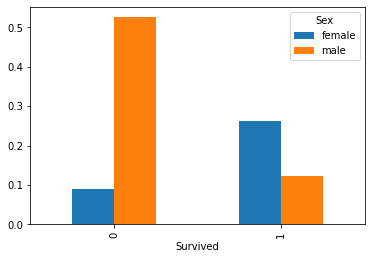

In [41]:
pd.crosstab(data['Survived'],data['Sex'],normalize=True).plot.bar()

<AxesSubplot:xlabel='Survived'>

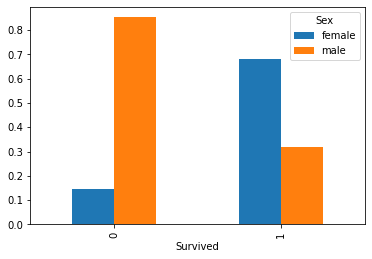

In [42]:
pd.crosstab(data['Survived'],data['Sex'],normalize='index').plot.bar()

In [43]:
data.groupby('Survived')['Sex'].value_counts(1)

Survived  Sex   
0         male      0.852459
          female    0.147541
1         female    0.681287
          male      0.318713
Name: Sex, dtype: float64

<AxesSubplot:xlabel='Survived'>

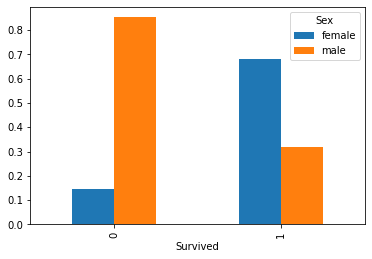

In [44]:
data.groupby('Survived')['Sex'].value_counts(1).unstack().plot(kind='bar')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='Age'>

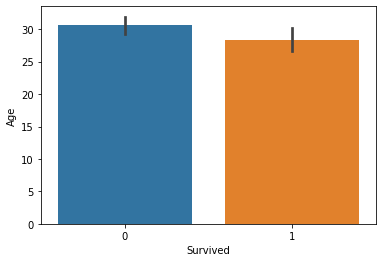

In [45]:
sns.barplot(data['Survived'],data['Age'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='Age'>

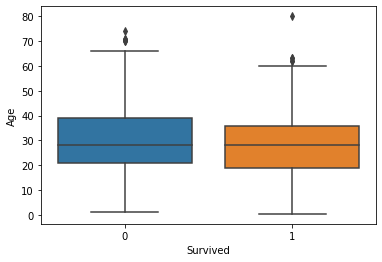

In [46]:
sns.boxplot(data['Survived'],data['Age'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='Age'>

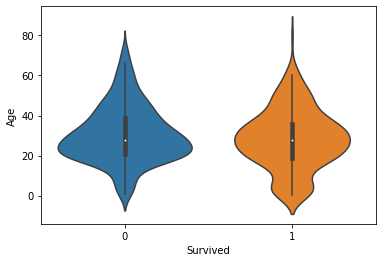

In [47]:
sns.violinplot(data['Survived'],data['Age'])

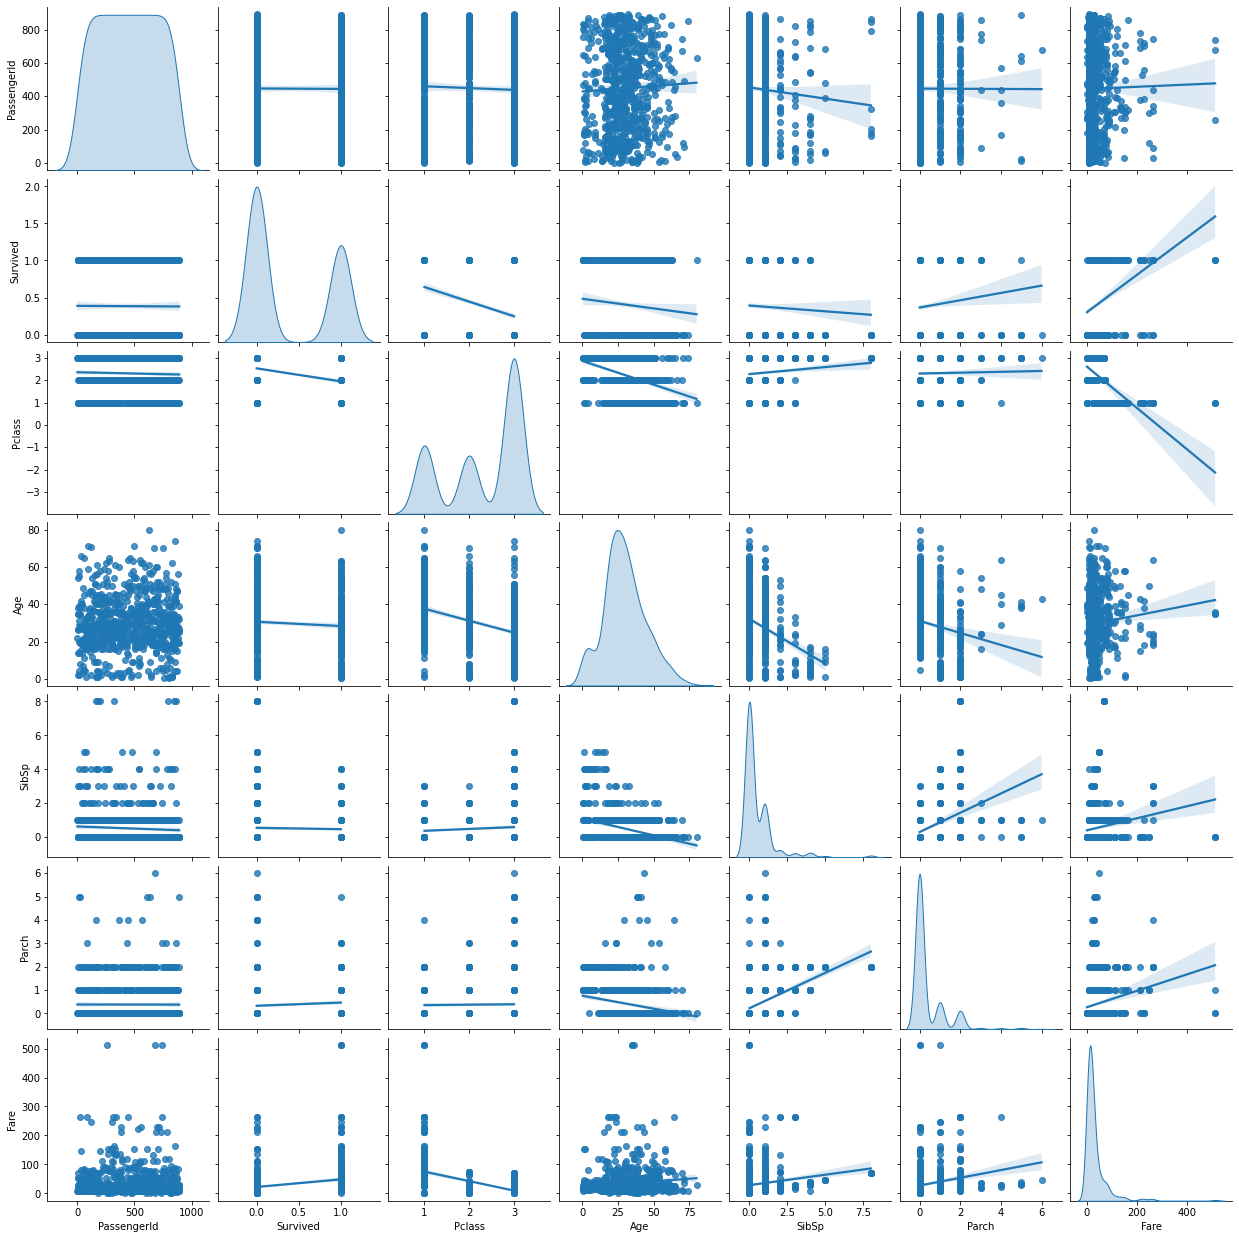

In [48]:
sns.pairplot(data, kind = 'reg',diag_kind='kde' )

In [49]:
data[data['Fare']==data['Fare'].max()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [50]:
data[data['Age']==data['Age'].max()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S


<AxesSubplot:>

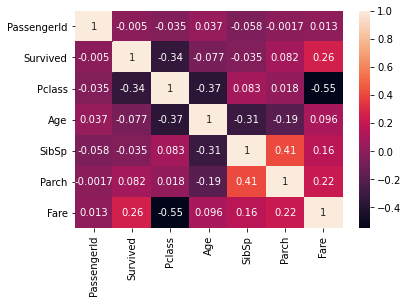

In [51]:
sns.heatmap(data.corr(),annot=True)

<AxesSubplot:>

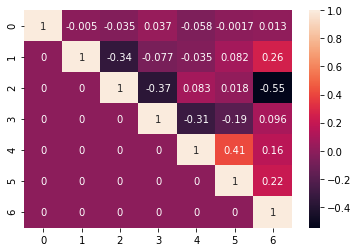

In [52]:
sns.heatmap(np.triu(data.corr()),annot=True)

<AxesSubplot:>

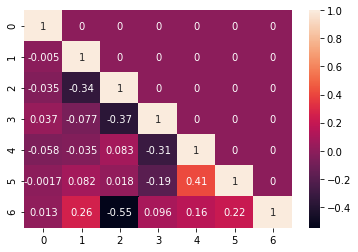

In [53]:
sns.heatmap(np.tril(data.corr()),annot=True)

<AxesSubplot:xlabel='Survived,Parch'>

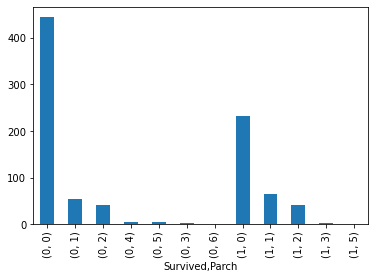

In [54]:
data.groupby('Survived')['Parch'].value_counts().plot.bar()

In [55]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [57]:
data.isnull().sum()/data.shape[0] *100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [58]:
data['Embarked'].mode()

0    S
dtype: object

In [59]:
data['Embarked'].value_counts(1)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

In [60]:
data['Embarked'].fillna(data['Embarked'].mode()[0]).value_counts(1)

S    0.725028
C    0.188552
Q    0.086420
Name: Embarked, dtype: float64

In [61]:
data['Embarked'].fillna(method='ffill').value_counts(1)

S    0.722783
C    0.189675
Q    0.087542
Name: Embarked, dtype: float64

In [62]:
data['Embarked'].fillna(method='bfill',inplace=True)

In [63]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [64]:
data['Cabin'].fillna(-1)

0        -1
1       C85
2        -1
3      C123
4        -1
       ... 
886      -1
887     B42
888      -1
889    C148
890      -1
Name: Cabin, Length: 891, dtype: object

In [65]:
data = data.drop('Cabin',axis=1)

In [66]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


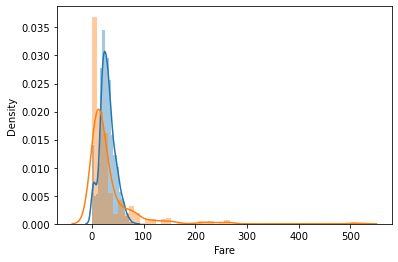

In [67]:
sns.distplot(data.Age)
sns.distplot(data.Fare)
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Fare'>

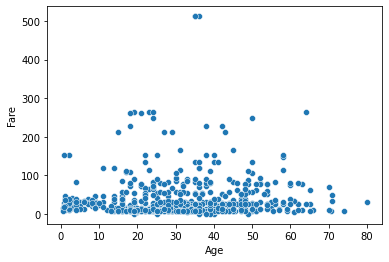

In [68]:
sns.scatterplot(x='Age',y='Fare',data=data)

In [69]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [70]:
data.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [71]:
data[data['Age'].isnull()]['Pclass'].value_counts()

3    136
1     30
2     11
Name: Pclass, dtype: int64

In [72]:
data[data['Age'].isnull()]['Sex'].value_counts()

male      124
female     53
Name: Sex, dtype: int64

In [73]:
data[(data['Age'].isnull()) & (data['Pclass']==3)]['Sex'].value_counts()

male      94
female    42
Name: Sex, dtype: int64

In [74]:
data[(~(data['Age'].isnull()) & (data['Pclass']==3))].groupby('Sex').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,406.500000,0.460784,3.0,21.750000,0.823529,0.950980,15.875369
male,455.217391,0.150198,3.0,26.507589,0.490119,0.256917,12.162695


In [75]:
data[(data['Age'].isnull()) & (data['Pclass']==3) & (data['Sex']=='female')]['Age'].fillna(21.75,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [76]:
data[(data['Age'].isnull()) & (data['Pclass']==3) & (data['Sex']=='male')]['Age'].fillna(26.5,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [77]:
data[(~(data['Age'].isnull()) & (data['Pclass']==2))].groupby('Sex').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,442.905405,0.918919,2.0,28.722973,0.500000,0.621622,21.951070
male,450.333333,0.151515,2.0,30.740707,0.373737,0.242424,21.113131


In [78]:
data[(data['Age'].isnull()) & (data['Pclass']==2) & (data['Sex']=='female')]['Age'].fillna(28.72,inplace=True)
data[(data['Age'].isnull()) & (data['Pclass']==2) & (data['Sex']=='male')]['Age'].fillna(30.74,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [79]:
data[(~(data['Age'].isnull()) & (data['Pclass']==1))].groupby('Sex').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,478.282353,0.964706,1.0,34.611765,0.541176,0.494118,107.946275
male,451.910891,0.396040,1.0,41.281386,0.376238,0.336634,71.142781


In [80]:
data[(data['Age'].isnull()) & (data['Pclass']==1) & (data['Sex']=='female')]['Age'].fillna(34.61,inplace=True)
data[(data['Age'].isnull()) & (data['Pclass']==1) & (data['Sex']=='male')]['Age'].fillna(41.28,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [81]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [82]:
# outliers

<AxesSubplot:>

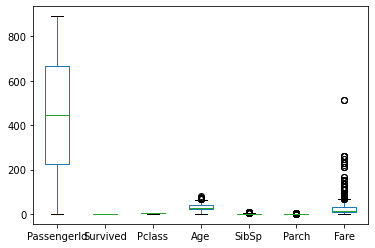

In [83]:
data[num_variables].plot.box()

In [84]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [85]:
data['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

<AxesSubplot:ylabel='Age'>

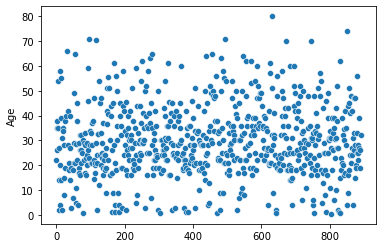

In [86]:
sns.scatterplot(x= data.Age.index, y = data.Age)

In [87]:
# zscore

In [88]:
# IQR

In [89]:
Q1 = np.quantile(data.Age,0.25)
Q3 = np.quantile(data.Age,0.75)
IQR = Q3 - Q1
print(IQR)

nan


In [90]:
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

17.875


In [91]:
outliers = Q3 + (1.5 * IQR)
inliers = Q1 - (1.5 * IQR)
print(outliers)
print(inliers)

64.8125
-6.6875


In [92]:
data[(data['Age'] < inliers) | (data['Age'] > outliers)]['Age']

33     66.0
54     65.0
96     71.0
116    70.5
280    65.0
456    65.0
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: Age, dtype: float64

In [93]:
data['Age'].fillna(25.6, inplace=True)

In [94]:
from scipy import stats

In [95]:
z = stats.zscore(data['Age'])
z[z>3]

array([3.21557894, 3.17740294, 3.21557894, 3.90274701, 3.13922693,
       3.13922693, 3.44463496])

In [96]:
data[z>3]['Age']

96     71.0
116    70.5
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: Age, dtype: float64

In [100]:
data[data['Age']<70]['Age'].max()

66.0

In [101]:
# treat outliers

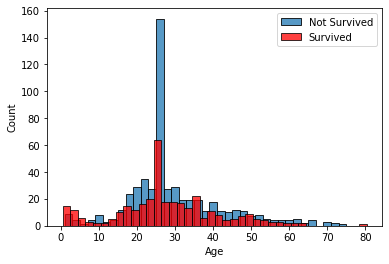

In [105]:
sns.histplot(data[(data['Survived']==0)]['Age'],binwidth=2)
sns.histplot(data[(data['Survived']==1)]['Age'],color='r',binwidth=2)
plt.legend(['Not Survived','Survived'])

In [108]:
data[z<=3].shape[0]

884

In [112]:
#iqr
(data[~((data['Age'] < inliers) | (data['Age'] > outliers))]).shape[0]

880

In [113]:
z = (stats.zscore(data['Age']))
sd_3 = data[z>3].index
sd_3neg = data[z<(-3)].index

In [114]:
data[z>3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,S


In [115]:
data[data['Age']<inliers]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [117]:
data[data['Age']>outliers].index

Int64Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')

In [118]:
# feature 

In [119]:
data['Family'] = data['SibSp']+data['Parch']+1

In [120]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


<AxesSubplot:xlabel='Family', ylabel='count'>

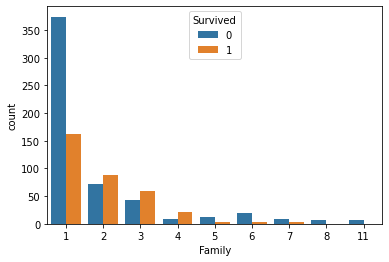

In [123]:
sns.countplot(x='Family', hue='Survived',data=data)

In [124]:
titles = data['Name'].str.split(',').str[1].str.split('.').str[0]

In [127]:
titles_other = [' Don', ' Rev', ' Dr',' Major', ' Lady', ' Sir', ' Col', ' Capt',
       ' the Countess', ' Jonkheer']

In [128]:
data['Titles']= titles

In [130]:
data['Titles'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], dtype=object)

In [131]:
title = data['Titles'].replace(to_replace=titles_other,value='Others' )

In [132]:
title.unique()

array([' Mr', ' Mrs', ' Miss', ' Master', 'Others', ' Mme', ' Ms',
       ' Mlle'], dtype=object)

In [133]:
data['Titles']= title.replace({' Mme':' Mrs'}).replace({' Mlle':' Ms'}).replace(' Miss', ' Ms')

In [134]:
data['Titles'].unique()

array([' Mr', ' Mrs', ' Ms', ' Master', 'Others'], dtype=object)

<AxesSubplot:xlabel='Survived'>

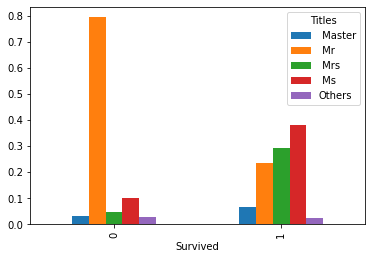

In [138]:
pd.crosstab(data['Survived'],data['Titles'],normalize='index').plot.bar()

In [139]:
# encoding

In [140]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family,Titles
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,Ms
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,Mr


In [141]:
data = pd.concat([data,pd.get_dummies(data['Sex'],drop_first=True)], axis=1)

In [142]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family,Titles,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,Mrs,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,Ms,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,Mrs,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,Mr,1


In [143]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first')
embarked=ohe.fit_transform(data[['Embarked']]).toarray()
embarked

array([[0., 1.],
       [0., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 0.],
       [1., 0.]])

In [144]:
ohe.get_feature_names()

array(['x0_Q', 'x0_S'], dtype=object)

In [145]:
data = pd.concat([data,pd.DataFrame(embarked, columns=ohe.get_feature_names())],axis=1)

In [152]:
data['Titles'].value_counts()

 Mr        517
 Ms        185
 Mrs       126
 Master     40
Others      23
Name: Titles, dtype: int64

In [153]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
t =le.fit_transform(data['Titles'])

In [154]:
pd.Series(t).value_counts()

1    517
3    185
2    126
0     40
4     23
dtype: int64

In [155]:
data['Titles']=data['Titles'].map({ ' Mr' : 5,' Ms': 4,' Mrs': 3 ,' Master': 2,'Others': 1})

In [156]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family,Titles,male,x0_Q,x0_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,5,1,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,3,0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,4,0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,3,0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,5,1,0.0,1.0


In [157]:
data = data.drop(['PassengerId','Name','Sex','SibSp','Parch', 'Ticket', 'Embarked'], axis = 1)

In [158]:
data.head()

,Survived,Pclass,Age,Fare,Family,Titles,male,x0_Q,x0_S
0,0,3,22.0,7.2500,2,5,1,0.0,1.0
1,1,1,38.0,71.2833,2,3,0,0.0,0.0
2,1,3,26.0,7.9250,1,4,0,0.0,1.0
3,1,1,35.0,53.1000,2,3,0,0.0,1.0
4,0,3,35.0,8.0500,1,5,1,0.0,1.0


In [159]:
data_scale = data.drop(['Survived','Pclass','male','x0_Q','x0_S'], axis=1)

In [160]:
data_scale.head()

,Age,Fare,Family,Titles
0,22.0,7.2500,2,5
1,38.0,71.2833,2,3
2,26.0,7.9250,1,4
3,35.0,53.1000,2,3
4,35.0,8.0500,1,5


In [162]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
scaled_data = mms.fit_transform(data_scale)

In [163]:
df_trainscaled =pd.concat([data.drop(['Age','Fare','Family',"Titles"],axis=1), pd.DataFrame(scaled_data,columns=data_scale.columns)],axis=1)

In [164]:
x = df_trainscaled.drop('Survived',axis =1)
y = df_trainscaled['Survived']

In [165]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y, train_size = 0.7, random_state=120, shuffle=True)

In [166]:
np.random.seed(120)
np.random.randint(5,10,4)

array([5, 7, 5, 9])

In [167]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(623, 8)
(268, 8)
(623,)
(268,)
